In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats


# Metoda najmniejszych kwadratów

Nachylenie (a): 0.5999999999999999
Wyraz wolny (b): 2.200000000000003


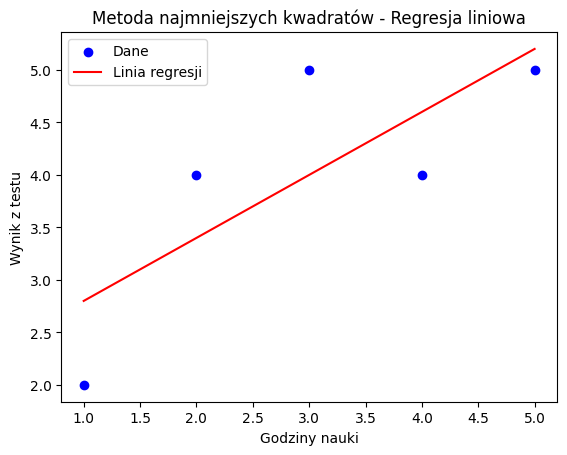

In [2]:
# Dane wejściowe: godziny nauki (x) i wyniki testu (y)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Tworzenie macierzy projektującej X (dodajemy kolumnę jedynek)
X = np.vstack((x, np.ones(len(x)))).T

# Obliczanie współczynników metodą najmniejszych kwadratów
# beta = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Wyodrębnienie parametrów a (nachylenie) i b (wyraz wolny)
a, b = beta

print(f"Nachylenie (a): {a}")
print(f"Wyraz wolny (b): {b}")

# Rysowanie wykresu danych i dopasowanej linii regresji
plt.scatter(x, y, color='blue', label='Dane')
plt.plot(x, a * x + b, color='red', label='Linia regresji')
plt.xlabel('Godziny nauki')
plt.ylabel('Wynik z testu')
plt.legend()
plt.title('Metoda najmniejszych kwadratów - Regresja liniowa')
plt.show()

In [3]:
# Obliczanie reszt (błędów) modelu
residuals = y - (a * x + b)

# Obliczanie wariancji reszt
residual_variance = np.var(residuals, ddof=2)

# Obliczanie macierzy kowariancji parametrów
XTX_inv = np.linalg.inv(X.T @ X)
param_covariance_matrix = residual_variance * XTX_inv

# Błędy standardowe parametrów a i b
param_errors = np.sqrt(np.diag(param_covariance_matrix))

error_a, error_b = param_errors

error_a, error_b

(np.float64(0.28284271247461895), np.float64(0.9380831519646857))

In [4]:
# Obliczanie współczynnika korelacji Pearsona z macierzy projektującej X i wektora y
# Współczynnik korelacji Pearsona: r = cov(X, y) / (std(X) * std(y))

# Obliczanie średnich
mean_x = np.mean(x)
mean_y = np.mean(y)

# Obliczanie kowariancji
cov_xy = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)

# Obliczanie odchyleń standardowych
std_x = np.std(x, ddof=1)
std_y = np.std(y, ddof=1)

# Obliczanie współczynnika korelacji Pearsona
pearson_coefficient = cov_xy / (std_x * std_y)

pearson_coefficient

np.float64(0.7745966692414834)

# Zadanie 1

Wykorzystując `np.random.normal`, wygeneruj dane testowe (1000 punktów na płaszczyźnie w zależnosci liniowej między x i y) , do których zastosuj metodę najmniejszych kwadratów (możesz użyć **stats.linregres, scipy.optimize.curve_fit, numpy.polyfit**).
- Znajdź parametry prostej $y = a \cdot x + b$ .


In [19]:
np.random.seed(42)
# Prawdziwe parametry prostej
a_true = 2.5
b_true = -1.0

# Generowanie danych
N = 1000
x = np.random.normal(0, 5, N)
noise = np.random.normal(0, 2, N)
y = a_true * x + b_true + noise

a_est, b_est = np.polyfit(x, y, 1)

print(f"Oszacowane parametry prostej:")
print(f"a = {a_est:.3f}")
print(f"b = {b_est:.3f}")


Oszacowane parametry prostej:
a = 2.484
b = -0.857


# Zadanie 2

Wczytaj dane z pliku **LungDisease.csv** do DataFrame za pomocą biblioteki `pandas`. Dane te zawierają informacje o liczbie lat, przez które pracownik był narażony na pył bawełniany (**Exposure**), oraz o miarze pojemności płuc (**PEFR** - szczytowy przepływ wydechowy).

- Następnie, używając biblioteki matplotlib lub seaborn, stwórz wykres punktowy, na którym na osi x znajdzie się zmienna **Exposure**, a na osi y zmienna **PEFR**.

- Po stworzeniu wykresu, oblicz współczynnik korelacji Pearsona między **Exposure** a **PEFR**, aby ilościowo określić siłę i kierunek zależności między tymi zmiennymi.

- Na koniec, dopasuj prostą regresji liniowej do danych, aby zobaczyć, jak **PEFR** zmienia się w zależności od **Exposure**. Wyświetl wykres z dopasowaną prostą regresji

- Zastanów się, czy na wykresie punktowym widać wyraźny trend lub wzorzec. Czy PEFR rośnie czy maleje wraz z Exposure? Czy są jakieś odstające punkty lub nietypowe dane?

In [28]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("LungDisease.csv")
df.head()


Saving LungDisease.csv to LungDisease (1).csv


,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


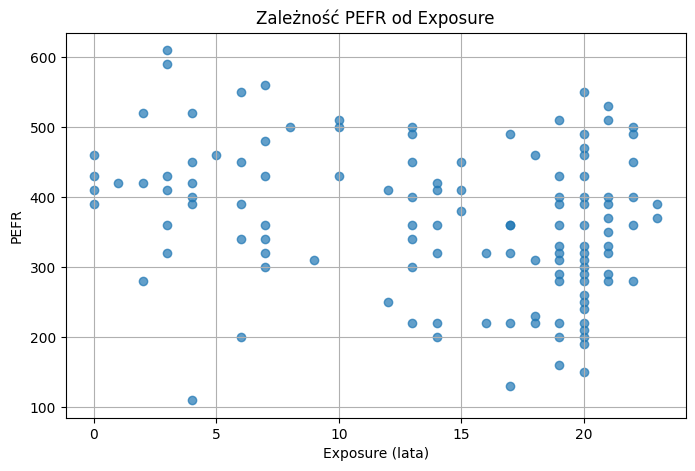

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df["Exposure"], df["PEFR"], alpha=0.7)
plt.xlabel("Exposure (lata)")
plt.ylabel("PEFR")
plt.title("Zależność PEFR od Exposure")
plt.grid(True)
plt.show()


In [30]:
correlation = df["Exposure"].corr(df["PEFR"], method="pearson")
print(f"Współczynnik korelacji Pearsona: {correlation:.3f}")

Współczynnik korelacji Pearsona: -0.277


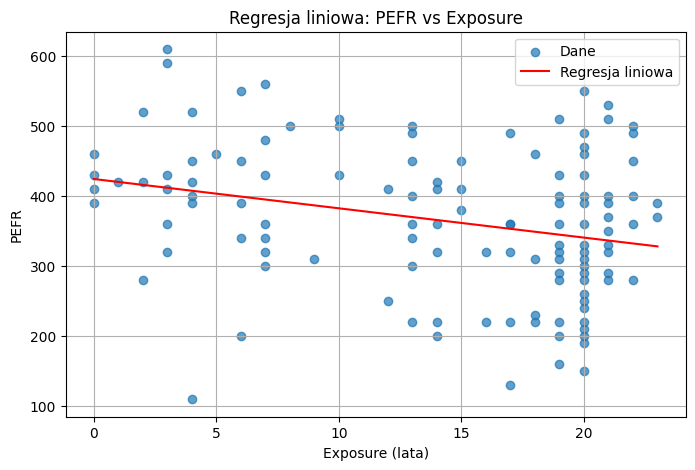

Równanie prostej: PEFR = -4.185 * Exposure + 424.583


In [31]:
a, b = np.polyfit(df["Exposure"], df["PEFR"], 1)

# Wartości do rysowania prostej
x_vals = np.linspace(df["Exposure"].min(), df["Exposure"].max(), 100)
y_vals = a * x_vals + b

plt.figure(figsize=(8, 5))
plt.scatter(df["Exposure"], df["PEFR"], alpha=0.7, label="Dane")
plt.plot(x_vals, y_vals, color="red", label="Regresja liniowa")
plt.xlabel("Exposure (lata)")
plt.ylabel("PEFR")
plt.title("Regresja liniowa: PEFR vs Exposure")
plt.legend()
plt.grid(True)
plt.show()

print(f"Równanie prostej: PEFR = {a:.3f} * Exposure + {b:.3f}")

In [ ]:
# Dane wskazują na negatywny wpływ długotrwałej ekspozycji na pył bawełniany na wydolność płuc,
# co jest widoczne zarówno wizualnie (wykres), jak i ilościowo (korelacja oraz regresja liniowa).

# Zadanie 3

1. **Wczytaj dane:**
   - Wczytaj dane z pliku `anscombe.csv` do DataFrame za pomocą biblioteki `pandas`.
   - Przekształć dane, aby miały format:

     ```
         x1    y1    x2    y2    x3     y3   x4    y4
     0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
     1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
     ```

2. **Stwórz wykresy punktowe:**
   - Użyj biblioteki `matplotlib` lub `seaborn`, aby stworzyć wykresy.
   - Na każdej osi (`ax`) umieść wykres punktowy dla par `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.

3. **Dopasuj funkcje liniowe:**
   - Dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4` dopasuj funkcję liniową w postaci $y = a \cdot x + b$.
   - Oblicz współczynniki `a` i `b` wraz z błędami dla każdej pary.

4. **Oblicz współczynnik korelacji:**
   - Oblicz współczynnik korelacji Pearsona dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.



In [32]:
from google.colab import files
uploaded = files.upload()


Saving anscombe.csv to anscombe.csv


In [42]:
df = pd.read_csv("anscombe.csv" , skiprows =1)

new_columns = []
for i in range(4):
    new_columns.extend([f'x{i+1}', f'y{i+1}'])

df.columns = new_columns

df_wide = df
df_wide.head()

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47


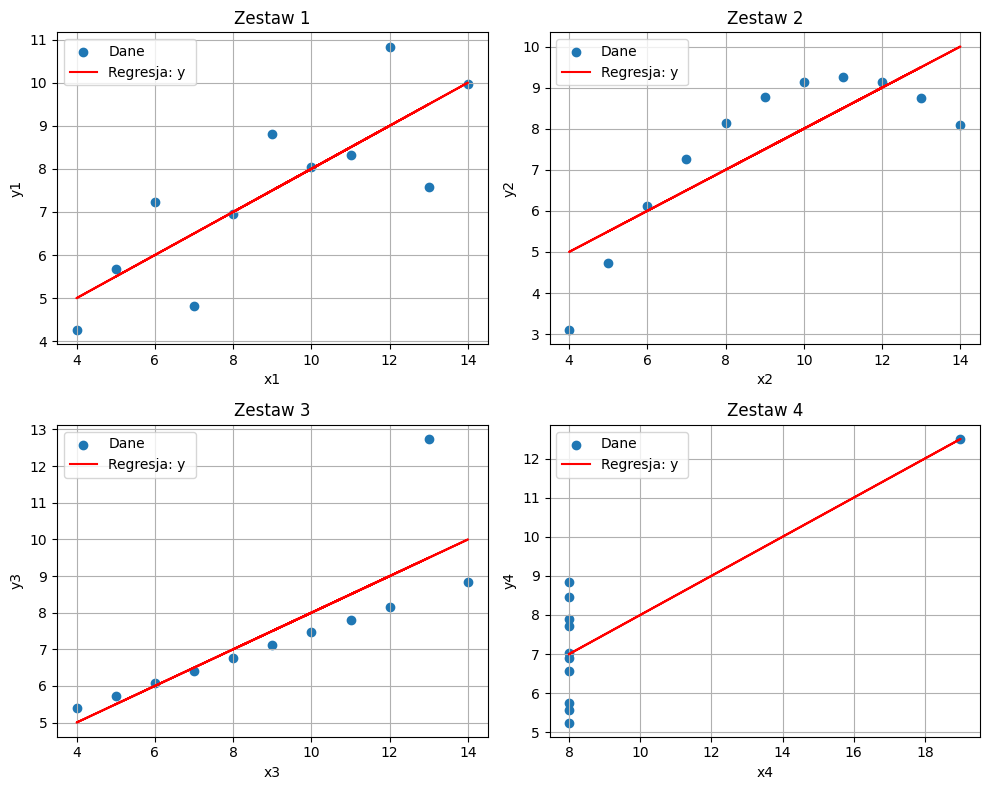


Wyniki regresji liniowej i korelacji Pearsona dla każdego zestawu danych:

Zestaw 1:
  Nachylenie (a): 0.500 (Błąd standardowy: 0.118)
  Wyraz wolny (b): 3.000 (Błąd standardowy: 1.125)
  Współczynnik korelacji Pearsona (r): 0.816

Zestaw 2:
  Nachylenie (a): 0.500 (Błąd standardowy: 0.118)
  Wyraz wolny (b): 3.001 (Błąd standardowy: 1.125)
  Współczynnik korelacji Pearsona (r): 0.816

Zestaw 3:
  Nachylenie (a): 0.500 (Błąd standardowy: 0.118)
  Wyraz wolny (b): 3.002 (Błąd standardowy: 1.124)
  Współczynnik korelacji Pearsona (r): 0.816

Zestaw 4:
  Nachylenie (a): 0.500 (Błąd standardowy: 0.118)
  Wyraz wolny (b): 3.002 (Błąd standardowy: 1.124)
  Współczynnik korelacji Pearsona (r): 0.817


In [47]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

pairs = [('x1', 'y1'), ('x2', 'y2'), ('x3', 'y3'), ('x4', 'y4')]

results = {}

for i, (x_col, y_col) in enumerate(pairs):
    x_data = df_wide[x_col]
    y_data = df_wide[y_col]

    axes[i].scatter(x_data, y_data, label='Dane')
    a, b = np.polyfit(x_data, y_data, 1)

    residuals = y_data - (a * x_data + b)
    residual_variance = np.sum(residuals**2) / (len(x_data) - 2)

    X_design = np.vstack([x_data, np.ones(len(x_data))]).T
    XTX_inv = np.linalg.inv(X_design.T @ X_design)
    param_covariance_matrix = residual_variance * XTX_inv

    error_a, error_b = np.sqrt(np.diag(param_covariance_matrix))

    axes[i].plot(x_data, a * x_data + b, color='red', label=f'Regresja: y ')

    correlation = x_data.corr(y_data, method='pearson')

    axes[i].set_title(f'Zestaw {i+1}')
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)
    axes[i].legend()
    axes[i].grid(True)

    results[f'Zestaw {i+1}'] = {
        'a': a,
        'b': b,
        'error_a': error_a,
        'error_b': error_b,
        'correlation': correlation
    }

plt.tight_layout()
plt.show()

print("\nWyniki regresji liniowej i korelacji Pearsona dla każdego zestawu danych:")
for key, value in results.items():
    print(f"\n{key}:")
    print(f"  Nachylenie (a): {value['a']:.3f} (Błąd standardowy: {value['error_a']:.3f})")
    print(f"  Wyraz wolny (b): {value['b']:.3f} (Błąd standardowy: {value['error_b']:.3f})")
    print(f"  Współczynnik korelacji Pearsona (r): {value['correlation']:.3f}")